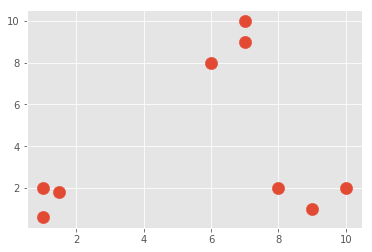

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

data =np.array([[1, 2],
              [1.5, 1.8],
              [6, 8 ],
              [7, 9],
              [1, 0.6],
              [7,10],
              [8,2],
              [10,2],
              [9,1],])

plt.scatter(data[:,0], data[:,1], s=150)
plt.show()

In [2]:
num_of_centroid=3

In [3]:
centroids={}
for i in range(num_of_centroid):
    centroids[i] = data[i]

In [4]:
max_iterations=100
tolerance=0.0001

In [5]:
import math
def Euclidean_distance(feature,centroid):
    return np.sqrt(np.sum(np.square(feature-centroid)))

In [6]:
for i in range(max_iterations):
    classes = {}
    for i in range(num_of_centroid):
        classes[i] = []

    for features in data:
        distances = [Euclidean_distance(features,centroids[centroid]) for centroid in centroids]
        classification = distances.index(min(distances))
        classes[classification].append(features)
    
    previous = dict(centroids)
    for classification in classes:
        centroids[classification] = np.average(classes[classification], axis = 0)
        
    isOptimal = True
    for centroid in centroids:

        original_centroid = previous[centroid]
        curr = centroids[centroid]

        if np.sum((curr - original_centroid)/original_centroid * 100.0) > tolerance:
            isOptimal = False

    if isOptimal:
        break

In [7]:
colors = ["r", "g", "b"]

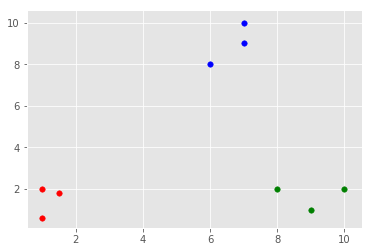

In [8]:
for classification in classes:
    color = colors[classification] 
    for features in classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
plt.show()